<a href="https://colab.research.google.com/github/Mannar324/ML_Projects/blob/main/Heart_Disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

import Libraries

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics  
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,ConfusionMatrixDisplay

Data Collection

In [2]:
disease_data=pd.read_csv('/content/heart_disease_data.csv')

Data Exploration

In [3]:
disease_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
disease_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
disease_data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


In [6]:
disease_data.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [7]:
# check for unique values
disease_data.nunique()

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

In [8]:
disease_data['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

Data Cleaning

In [9]:
disease_data.isnull().sum()


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [10]:
# check for duplicate data
disease_data.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
298    False
299    False
300    False
301    False
302    False
Length: 303, dtype: bool

Check for Outliers

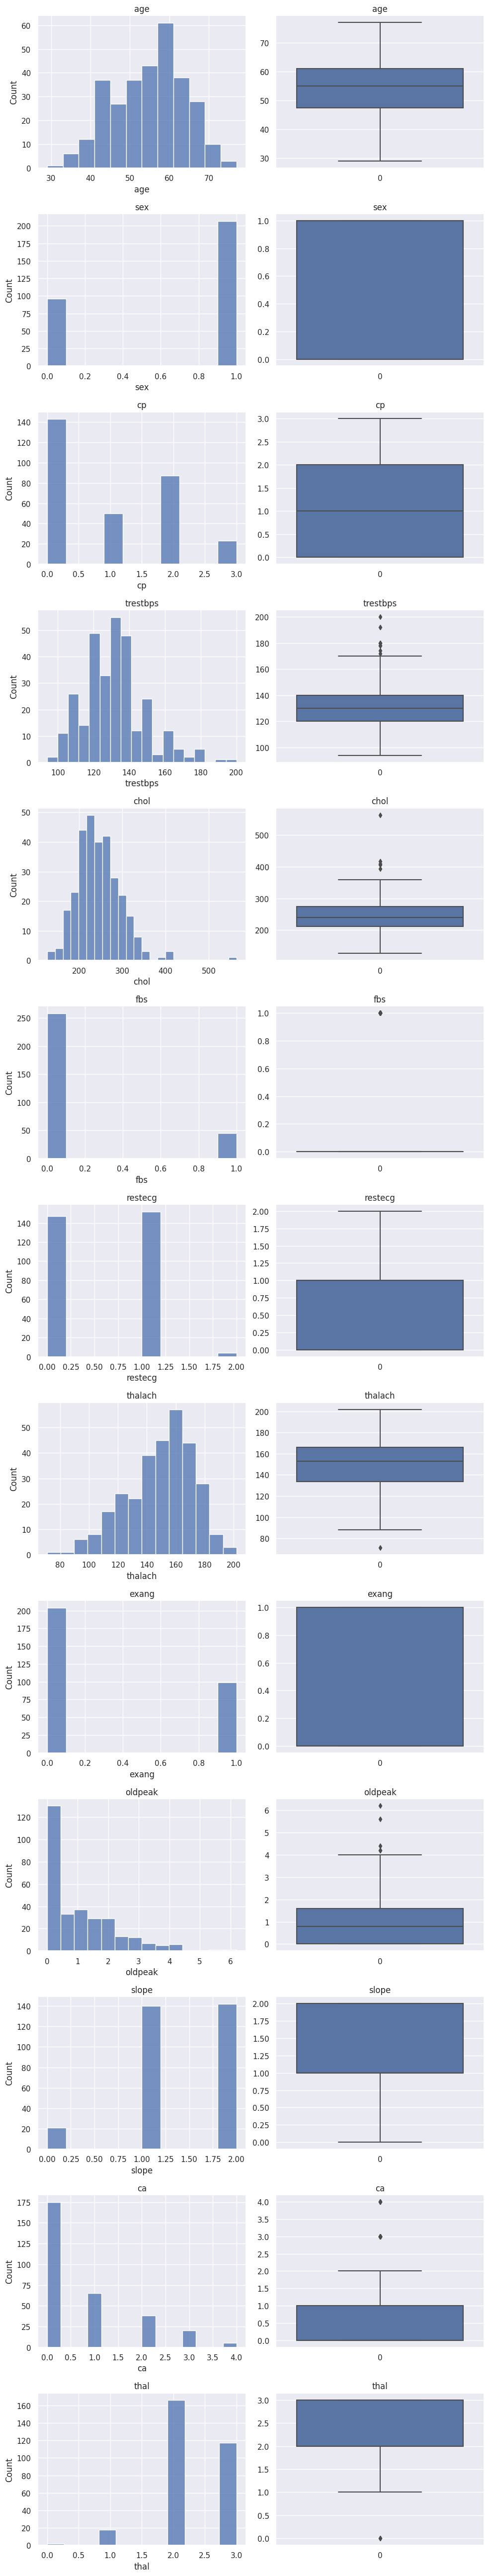

In [11]:
# Set the Seaborn theme
sns.set_theme()

# Define the list of features to plot
features = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']

# Create subplots for each feature
fig, axes = plt.subplots(nrows = len(features), ncols = 2, figsize = (10, 4*len(features)))

# Loop over each feature and plot a histogram and boxplot
for i, feature in enumerate(features):
    sns.histplot(disease_data[feature], ax=axes[i, 0])
    axes[i, 0].set_title(feature)
    
    sns.boxplot(data=disease_data[feature], ax=axes[i, 1])
    axes[i, 1].set_title(feature)

# Adjust the layout and display the plot
plt.tight_layout()
plt.show()

Visualization

1--> defective heart
0--> healthy

<Axes: xlabel='target', ylabel='count'>

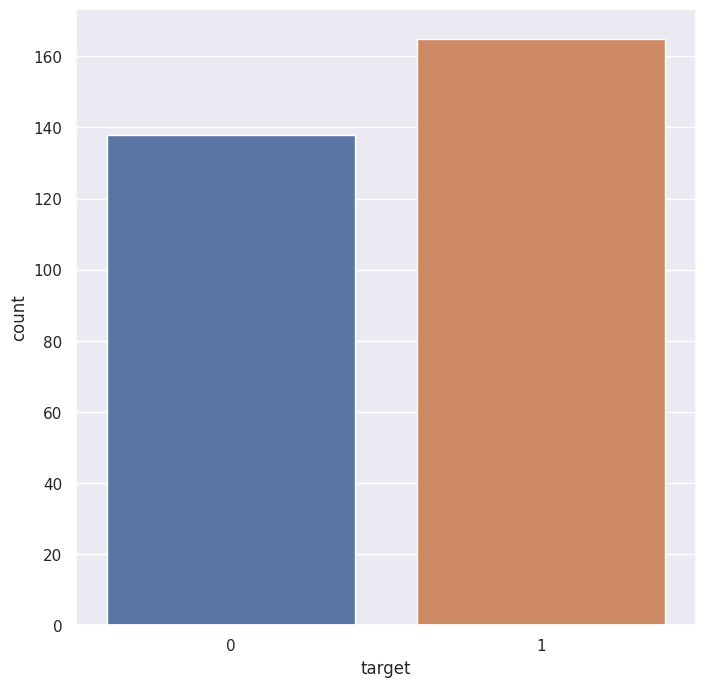

In [12]:
# check number of healthy and defective people
plt.figure(figsize=(8,8))
sns.set_theme()
sns.countplot(data=disease_data,x='target')

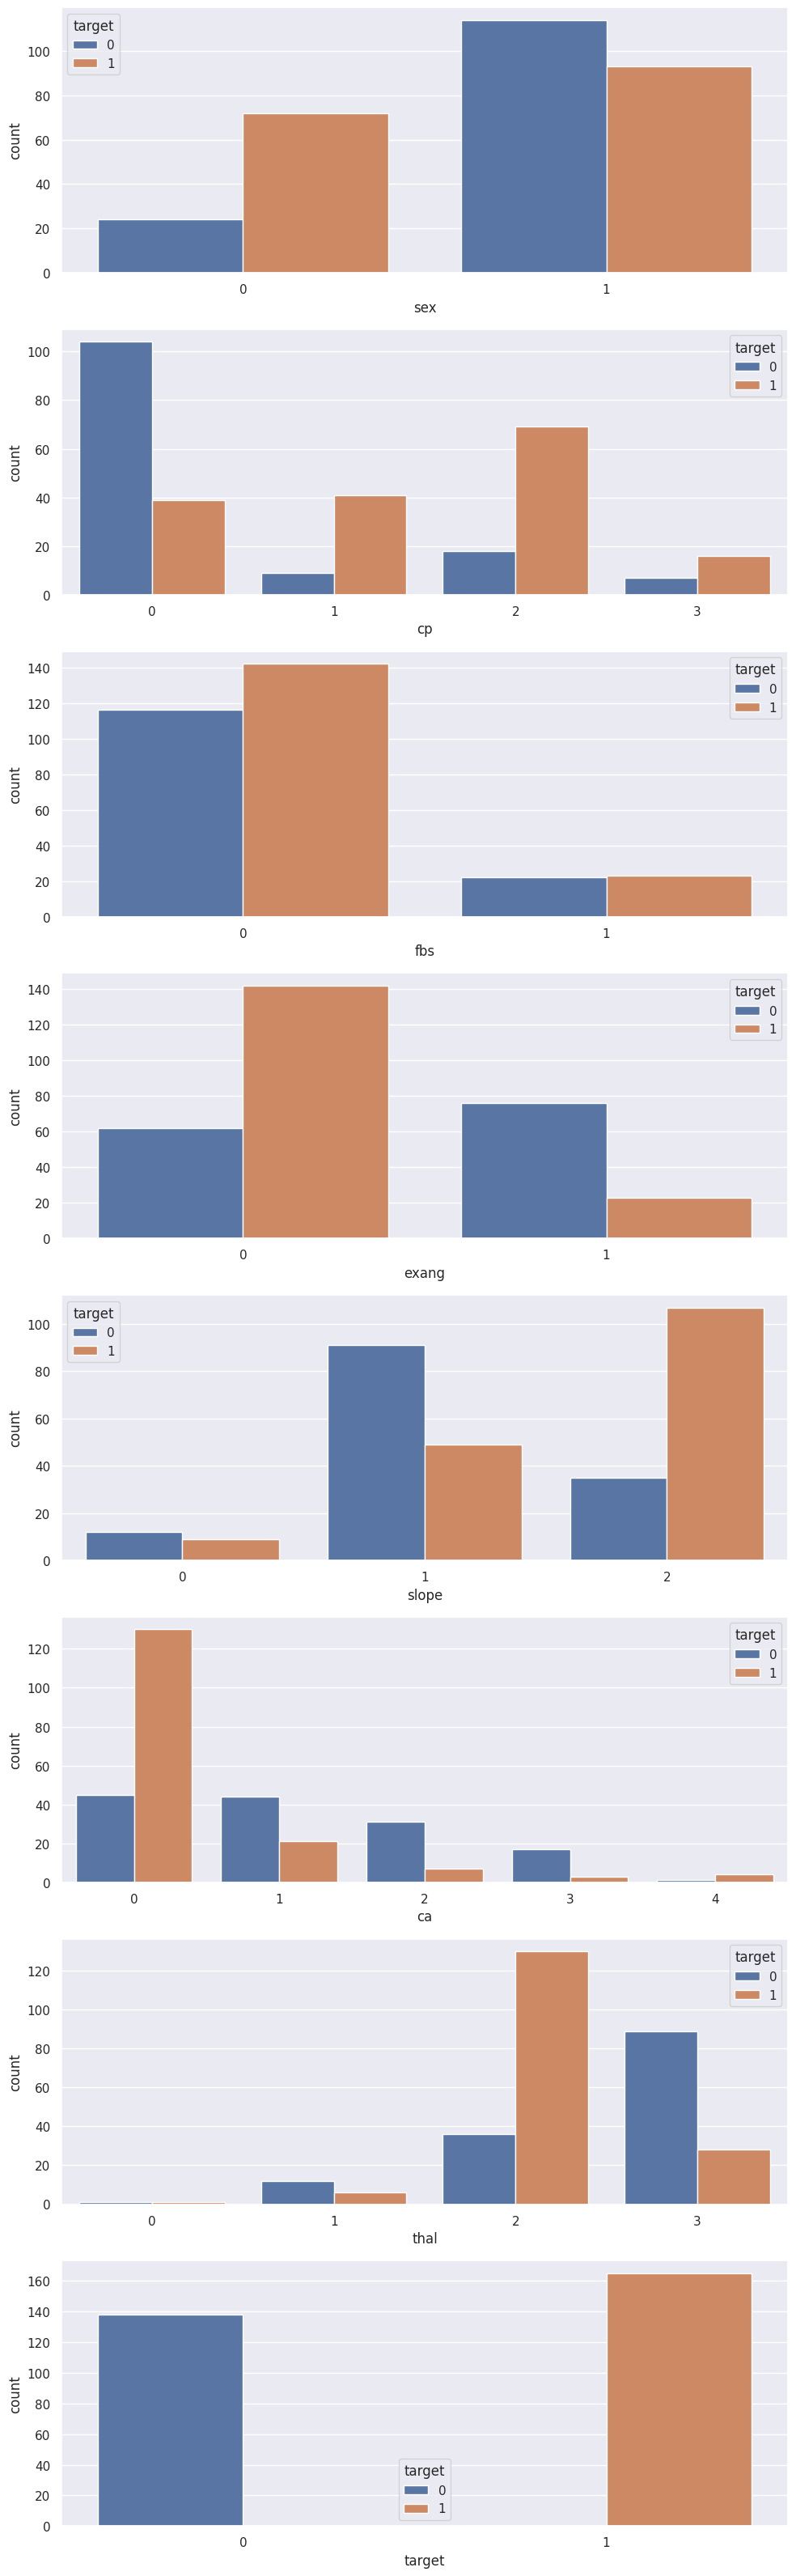

In [13]:
# see the relation between the features and target
sns.set_theme()

# Define the list of features to plot
features = ['sex', 'cp','fbs','exang','slope', 'ca', 'thal', 'target']

# Create subplots for each feature
fig, axes = plt.subplots(nrows=len(features), ncols=1, figsize=(10, 4*len(features)))

# Loop over each feature and plot a countplot
for i, feature in enumerate(features):
    sns.countplot(x=disease_data[feature],hue=disease_data['target'] ,ax=axes[i])
    

# Adjust the layout and display the plot
plt.tight_layout()
plt.show()   

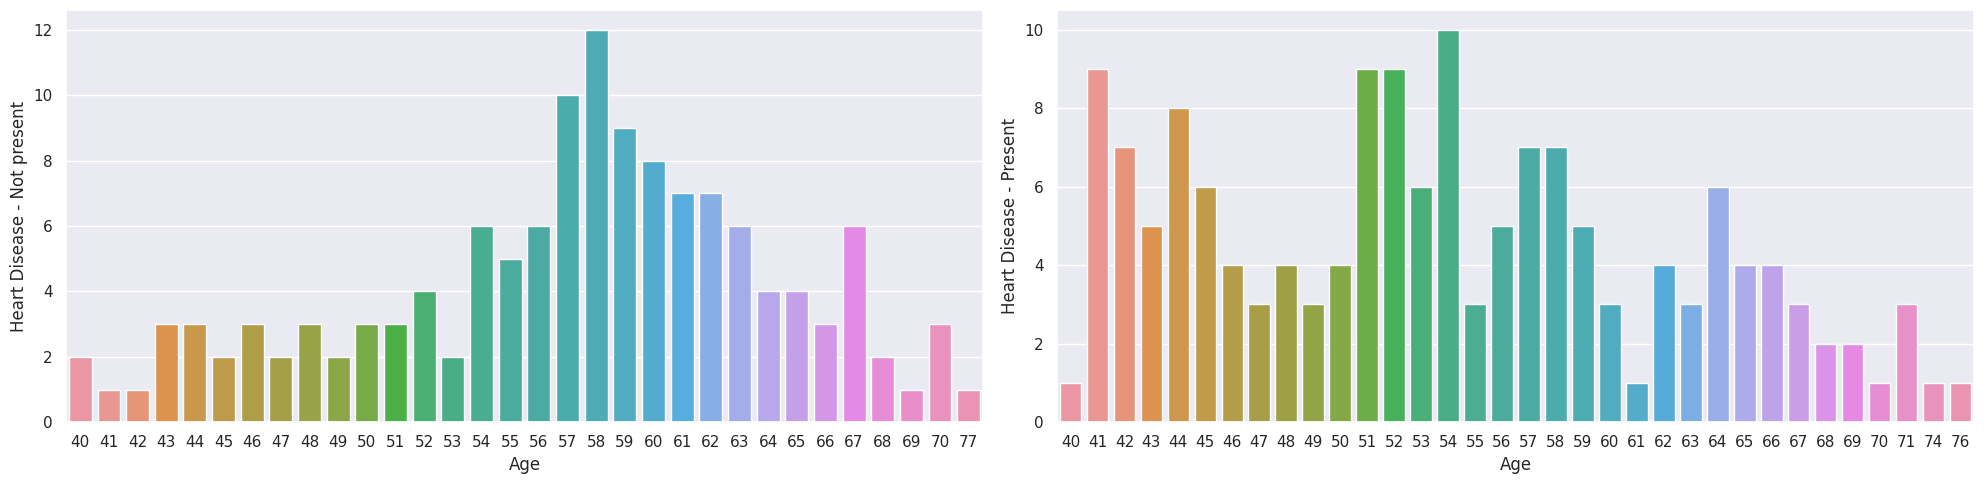

In [14]:
sns.set_theme()

# Create subplots for the two countplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,5))

# Plot the count of age when target is 0
sns.countplot(x='age', data=disease_data[(disease_data['age'] >= 40) & (disease_data['target'] == 0)], ax=axes[0])
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Heart Disease - Not present')

# Plot the count of age when target is 1
sns.countplot(x='age', data=disease_data[(disease_data['age'] >= 40) & (disease_data['target'] == 1)], ax=axes[1])
axes[1].set_xlabel('Age')
axes[1].set_ylabel('Heart Disease - Present')

# Adjust the layout and display the plot
plt.tight_layout()
plt.show()

Correlation between features

In [15]:
corr=disease_data.corr()

<Axes: >

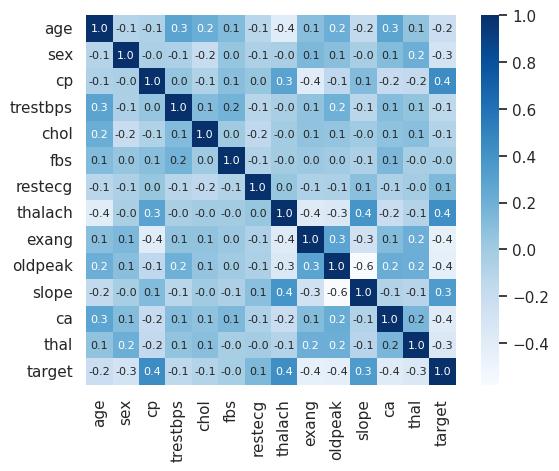

In [16]:
sns.heatmap(corr,cbar=True,square=True,fmt='.1f',annot=True,annot_kws={'size':8},cmap='Blues')

Split the features and target

In [17]:
# split tha data and target
X=disease_data.drop(['target'],axis=1)
Y=disease_data['target']
print(X)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  
0        0   0     1  
1        0   0     2  
2        2   0    

Feature Standardization

In [18]:
scaler=StandardScaler()
scaler.fit(X)
scaler.transform(X)

array([[ 0.9521966 ,  0.68100522,  1.97312292, ..., -2.27457861,
        -0.71442887, -2.14887271],
       [-1.91531289,  0.68100522,  1.00257707, ..., -2.27457861,
        -0.71442887, -0.51292188],
       [-1.47415758, -1.46841752,  0.03203122, ...,  0.97635214,
        -0.71442887, -0.51292188],
       ...,
       [ 1.50364073,  0.68100522, -0.93851463, ..., -0.64911323,
         1.24459328,  1.12302895],
       [ 0.29046364,  0.68100522, -0.93851463, ..., -0.64911323,
         0.26508221,  1.12302895],
       [ 0.29046364, -1.46841752,  0.03203122, ..., -0.64911323,
         0.26508221, -0.51292188]])

Split the training && test data

In [19]:
# spliting training and test data
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=2)
print(x_train.shape,x_test.shape,X.shape)

(242, 13) (61, 13) (303, 13)


Build && Train the model

Logistic Regression

In [20]:
#Logistic Regression

# Create a logistic regression model
model = LogisticRegression()

In [21]:
# Train the model on the training data
model.fit(x_train, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [22]:
# Make predictions on the test data
log_y_pred = model.predict(x_test)
log_y_pred1 = model.predict(x_train)

# Evaluate the model
accuracy = metrics.accuracy_score(y_test, log_y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.819672131147541


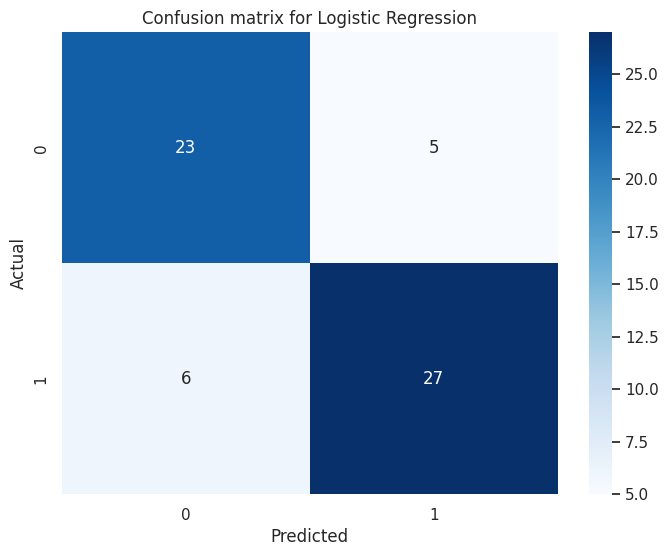

In [23]:
# Create a confusion matrix
cm = confusion_matrix(y_test, log_y_pred)

# Display the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion matrix for Logistic Regression')
plt.show()

In [24]:
# Calculate and display F1 score, recall, and precision
print(classification_report(y_test, log_y_pred))

              precision    recall  f1-score   support

           0       0.79      0.82      0.81        28
           1       0.84      0.82      0.83        33

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61



Naive Bayes

In [25]:
# Create a Naive Bayes model
naive_bayes = GaussianNB()

# Train the model on the training data
naive_bayes.fit(x_train, y_train)

# Make predictions on the testing data
nav_y_pred = naive_bayes.predict(x_test)

# Make predictions on the training data
nav_y_pred1 = naive_bayes.predict(x_train)

# Evaluate the model
accuracy = metrics.accuracy_score(y_test, nav_y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.819672131147541


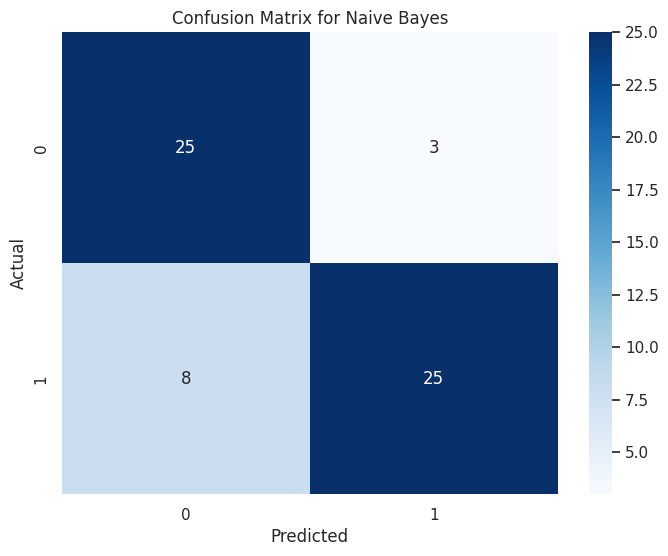

In [26]:
# Create a confusion matrix
cm = confusion_matrix(y_test, nav_y_pred)

# Display the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Naive Bayes')
plt.show()

In [27]:
# Calculate and display F1 score, recall, and precision
print(classification_report(y_test, nav_y_pred))

              precision    recall  f1-score   support

           0       0.76      0.89      0.82        28
           1       0.89      0.76      0.82        33

    accuracy                           0.82        61
   macro avg       0.83      0.83      0.82        61
weighted avg       0.83      0.82      0.82        61



Decision Tree

In [28]:
tree = DecisionTreeClassifier(random_state=2)
tree.fit(x_train, y_train)

DecisionTreeClassifier(random_state=2)

In [29]:
# Make predictions on the test data
Des_y_pred = tree.predict(x_test)

In [30]:
# Evaluate the performance of the model
accuracy = accuracy_score(y_test, Des_y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.7704918032786885


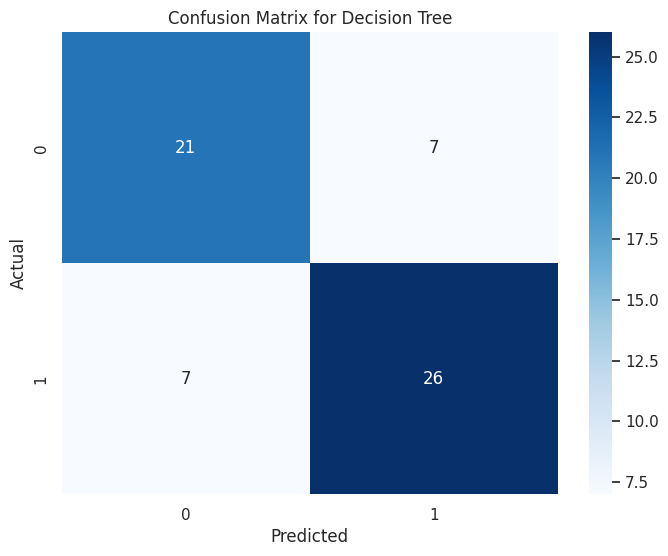

In [31]:
# Create a confusion matrix
cm = confusion_matrix(y_test, Des_y_pred)

# Display the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Decision Tree')
plt.show()

In [32]:
# Calculate and display F1 score, recall, and precision
print(classification_report(y_test,Des_y_pred ))

              precision    recall  f1-score   support

           0       0.75      0.75      0.75        28
           1       0.79      0.79      0.79        33

    accuracy                           0.77        61
   macro avg       0.77      0.77      0.77        61
weighted avg       0.77      0.77      0.77        61



The Logistic Regression and Naive Bayes model have the best accuracy =0.82 . The Decision Tree has the least accuracy =0.77. 

In [33]:
print("tha best model is: ",model,"have a accuracy=","%",0.82*100)

tha best model is:  LogisticRegression() have a accuracy= % 82.0


Build a Predictive System

In [34]:

input_data=[46,0,2,142,177,0,0,160,1,1.4,0,0,2]#does have a heart disease
input_data1=[67,1,0,160,286,0,0,108,1,1.5,1,3,2]#does not have a heart disease

#change input data into numpy array
input_data_as_array=np.asarray(input_data)

#reshape the numpy array as we predict for only one instance
input_data_reshaped = input_data_as_array.reshape(1,-1)
prediction = model.predict(input_data_reshaped)

if(prediction[0]==0):
  print("the person does not have a heart disease")
else:
    print("the person does have a heart disease")


the person does have a heart disease


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
